In [1]:
# Sampling Data for the interpolation
import numpy as np
import random

num_points = 10

# This will return a random points so we can't use the newton's method because the evenly spaced assumption is violated
x_n = [i for i in range(1, 11)]
y_n = [random.randint(1, 10) for _ in range(10)]

points = []

for i in range(num_points):
    points.append((x_n[i], y_n[i]))


In [2]:
import numpy as np
import matplotlib.pyplot as plt

def lagrange_interpolation(points, x):
    x_vals, y_vals = zip(*points)
    y_interpolated = 0

    for k in range(num_points):
        # Compute L_k(x)
        L_k = 1
        for i in range(num_points):
            if i != k:
                L_k *= (x - x_vals[i]) / (x_vals[k] - x_vals[i])

        # Multiply L_k(x) by y_k and sum
        y_interpolated += y_vals[k] * L_k

    return y_interpolated

In [3]:
# Now we need to draw the points and see if they are interpolated
import matplotlib.pyplot as plt

def plot_lagrange_interpolation(points):
    # Sort points by x
    points = sorted(points, key=lambda p: p[0])
    x_vals, y_vals = zip(*points)

    # Generate smooth curve
    x_smooth = np.linspace(min(x_vals), max(x_vals), 500)
    y_smooth = [lagrange_interpolation(points, x) for x in x_smooth]

    # Plot original points
    plt.scatter(x_vals, y_vals, color='red', marker='o', edgecolors='black', label="Original Points")

    # Plot interpolated curve
    plt.plot(x_smooth, y_smooth, color='blue', linestyle='-', linewidth=2, label="Lagrange Interpolation")

    # Labels and grid
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.title("Lagrange Polynomial Interpolation")
    plt.legend()
    plt.grid(True)
    plt.show()

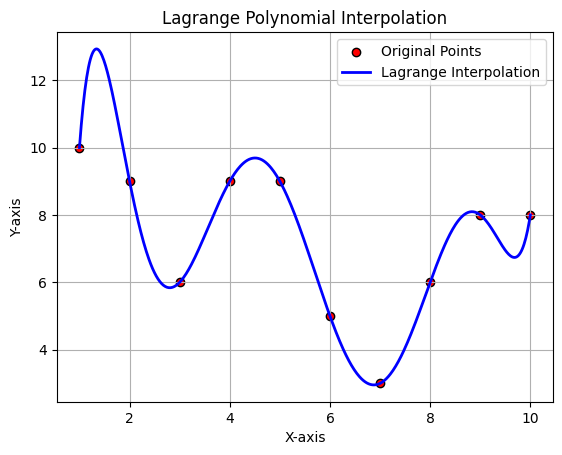

In [4]:
plot_lagrange_interpolation(points)

In [5]:
# Now we need to make newton's interpolation
import numpy as np
import matplotlib.pyplot as plt

def newton_interpolation(points, x):
    x_vals, y_vals = zip(*points)

    # Create divided difference table
    coef = np.zeros((num_points, num_points))
    coef[:, 0] = y_vals  # First column is just the y values

    for j in range(1, num_points):
        for i in range(num_points - j):
            coef[i][j] = (coef[i+1][j-1] - coef[i][j-1]) / (x_vals[i+j] - x_vals[i])

    # Compute the interpolation value at x
    interpolated_y = coef[0, 0]
    product_term = 1.0

    for i in range(1, num_points):
        product_term *= (x - x_vals[i-1])
        interpolated_y += coef[0, i] * product_term

    return interpolated_y

In [6]:
import matplotlib.pyplot as plt

def plot_newton_interpolation(points):
    # Sort points by x
    points = sorted(points, key=lambda p: p[0])
    x_vals, y_vals = zip(*points)

    # Generate smooth curve
    x_smooth = np.linspace(min(x_vals), max(x_vals), 500)
    y_smooth = [newton_interpolation(points, x) for x in x_smooth]

    # Plot original points
    plt.scatter(x_vals, y_vals, color='red', marker='o', edgecolors='black', label="Original Points")

    # Plot interpolated curve
    plt.plot(x_smooth, y_smooth, color='blue', linestyle='-', linewidth=2, label="Newton Interpolation")

    # Labels and grid
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.title("Newton's Polynomial Interpolation")
    plt.legend()
    plt.grid(True)
    plt.show()

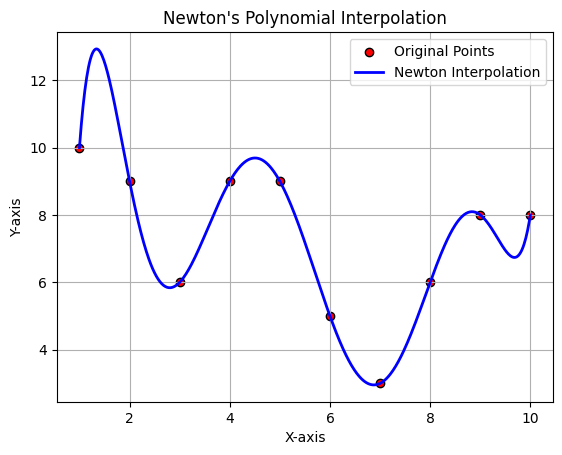

In [7]:
plot_newton_interpolation(points)